In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

In [77]:
df = pd.read_csv('temperature.csv',parse_dates=['datetime'],index_col="datetime")
df.round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.4,304.4,303.5
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.4,304.4,303.5
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.index

DatetimeIndex(['2012-10-01 12:00:00', '2012-10-01 13:00:00',
               '2012-10-01 14:00:00', '2012-10-01 15:00:00',
               '2012-10-01 16:00:00', '2012-10-01 17:00:00',
               '2012-10-01 18:00:00', '2012-10-01 19:00:00',
               '2012-10-01 20:00:00', '2012-10-01 21:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=45253, freq=None)

# Average temp of Van in month of june

In [13]:
df["2016-06-21"].Vancouver.mean()

290.3175

# Average temp of Van in month of dec  

In [17]:
df["2016-12-21"].Vancouver.mean()

277.5375

# Average temp of Portland in month of june

In [23]:
df["2016-06-21"].Portland.mean()

289.96666666666664

 # Average temp of Portland in month of dec  

In [24]:
df["2016-12-21"].Portland.mean()

275.4920833333333

# Average temperatures for all cities in monthof december 

In [32]:
df_dec = df["2016-12-21"].apply(lambda x: x.mean())
df_dec

Vancouver            277.537500
Portland             275.492083
San Francisco        282.442083
Seattle              277.252083
Los Angeles          289.624583
San Diego            290.963750
Las Vegas            280.304167
Phoenix              289.607083
Albuquerque          276.381667
Denver               280.344167
San Antonio          283.724583
Dallas               282.770000
Houston              286.022083
Kansas City          273.115417
Minneapolis          272.500000
Saint Louis          272.779583
Chicago              269.800417
Nashville            274.183333
Indianapolis         271.032083
Atlanta              278.623333
Detroit              269.245417
Jacksonville         283.533750
Charlotte            275.531667
Miami                295.584583
Pittsburgh           272.442917
Toronto              270.852917
Philadelphia         271.820000
New York             271.875833
Montreal             271.858750
Boston               273.632500
Beersheba            279.435333
Tel Aviv

In [31]:
df_june =df["2016-06-21"].apply(lambda x: x.mean())
df_june

Vancouver            290.317500
Portland             289.966667
San Francisco        296.272500
Seattle              288.984167
Los Angeles          302.383333
San Diego            299.220000
Las Vegas            311.297083
Phoenix              311.443333
Albuquerque          296.371250
Denver               297.071667
San Antonio          300.812500
Dallas               303.373750
Houston              300.649583
Kansas City          301.628750
Minneapolis          293.038333
Saint Louis          299.472083
Chicago              296.529167
Nashville            300.028333
Indianapolis         297.893333
Atlanta              297.997500
Detroit              296.724167
Jacksonville         299.058583
Charlotte            299.346250
Miami                299.599167
Pittsburgh           298.243750
Toronto              294.637500
Philadelphia         298.446250
New York             298.507917
Montreal             292.180000
Boston               295.447500
Beersheba            298.539958
Tel Aviv

# Average temperature of cities in month of june and dec 

In [42]:
df_new =pd.concat([df_june,df_dec],axis='columns').round(2)
df_new

,0,1
Vancouver,290.32,277.54
Portland,289.97,275.49
San Francisco,296.27,282.44
Seattle,288.98,277.25
Los Angeles,302.38,289.62
San Diego,299.22,290.96
Las Vegas,311.30,280.30
Phoenix,311.44,289.61
Albuquerque,296.37,276.38
Denver,297.07,280.34


In [36]:
def s(kelvin):
    c=(kelvin-273)
    return c 

In [38]:
df_c = df_new.loc['Vancouver' :'Jerusalem', :].apply(s,axis=0).round(2)
df_c

,0,1
Vancouver,17.32,4.54
Portland,16.97,2.49
San Francisco,23.27,9.44
Seattle,15.98,4.25
Los Angeles,29.38,16.62
San Diego,26.22,17.96
Las Vegas,38.30,7.30
Phoenix,38.44,16.61
Albuquerque,23.37,3.38
Denver,24.07,7.34


In [75]:
df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df['month']= df['datetime'].dt.month

KeyError: 'datetime'

apply() method. This function acts as a map() function in Python. It takes a function as an input and applies this function to an entire DataFrame.

## Write a function that efficiently converts every column to a different temperature scale

In [4]:
def s(kelvin):
    c=(kelvin-273)
    return c 

In [5]:
df_c = df.loc[: , 'Vancouver' :'Jerusalem'].apply(s,axis=0).round(2)
df_c

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.10,NaN,NaN,NaN
1,11.63,9.08,16.48,8.80,18.87,18.53,20.41,23.60,12.12,11.61,...,12.63,15.22,12.83,14.17,34.59,32.47,37.58,31.4,31.4,30.5
2,11.63,9.08,16.47,8.80,18.87,18.53,20.40,23.61,12.15,11.61,...,12.66,15.25,12.83,14.19,34.59,31.31,37.50,31.4,31.4,30.5
3,11.63,9.09,16.46,8.79,18.86,18.54,20.39,23.63,12.23,11.60,...,12.76,15.33,12.85,14.23,34.39,31.28,37.41,31.4,31.4,30.5
4,11.62,9.10,16.45,8.78,18.86,18.55,20.38,23.65,12.31,11.59,...,12.85,15.41,12.86,14.28,34.15,31.24,37.33,31.4,31.4,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,9.00,NaN,7.82,20.55,19.15,16.54,21.71,12.72,16.56,...,17.24,NaN,2.13,15.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,NaN,9.89,NaN,8.65,22.68,19.74,17.61,22.59,13.45,17.70,...,16.24,NaN,1.13,13.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,NaN,10.39,NaN,9.75,22.96,19.58,18.34,23.25,13.44,16.71,...,13.78,NaN,0.48,10.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,NaN,10.02,NaN,9.96,22.65,19.61,19.15,24.15,13.14,16.17,...,11.57,NaN,-0.52,9.17,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def myfunc(kelvin):

    f=(kelvin-273) + 32
    f1 = f*1.8 
    return f1

In [7]:
df_f = df.loc[: , 'Vancouver' :'Jerusalem'].apply(myfunc,axis=0).round(2)
df_f

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,122.58,NaN,NaN,NaN
1,78.53,73.94,87.26,73.44,91.57,90.95,94.34,100.08,79.42,78.50,...,80.33,85.00,80.69,83.11,119.86,116.05,125.24,114.12,114.12,112.5
2,78.53,73.95,87.25,73.43,91.56,90.96,94.33,100.10,79.48,78.49,...,80.39,85.05,80.70,83.13,119.86,113.96,125.09,114.12,114.12,112.5
3,78.53,73.97,87.23,73.42,91.55,90.98,94.31,100.14,79.62,78.48,...,80.56,85.19,80.73,83.22,119.50,113.91,124.94,114.12,114.12,112.5
4,78.52,73.98,87.20,73.41,91.54,91.00,94.29,100.18,79.76,78.47,...,80.73,85.33,80.75,83.30,119.06,113.83,124.79,114.12,114.12,112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,73.80,NaN,71.68,94.59,92.07,87.37,96.68,80.50,87.41,...,88.63,NaN,61.43,84.74,NaN,NaN,NaN,NaN,NaN,NaN
45249,NaN,75.40,NaN,73.17,98.42,93.13,89.30,98.26,81.81,89.46,...,86.83,NaN,59.63,81.04,NaN,NaN,NaN,NaN,NaN,NaN
45250,NaN,76.30,NaN,75.15,98.93,92.84,90.61,99.45,81.79,87.68,...,82.40,NaN,58.46,77.29,NaN,NaN,NaN,NaN,NaN,NaN
45251,NaN,75.64,NaN,75.53,98.37,92.90,92.07,101.07,81.25,86.71,...,78.43,NaN,56.66,74.11,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.isnull().head(100)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.interpolate(method='linear', limit_area='inside').head(100).round(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.40,304.40,303.50
2,2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.40,304.40,303.50
3,2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.40,304.40,303.50
4,2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.40,304.40,303.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2012-10-05 11:00:00,279.86,284.24,288.24,281.08,289.67,291.15,295.77,295.93,286.62,...,292.28,292.34,285.09,288.56,308.15,303.40,305.54,300.41,300.41,301.09
96,2012-10-05 12:00:00,279.54,283.52,288.22,280.64,289.82,291.11,295.22,294.83,285.91,...,292.63,293.18,285.04,288.67,305.37,302.56,305.87,299.20,299.20,299.00
97,2012-10-05 13:00:00,278.57,283.53,288.60,281.14,290.25,290.93,294.07,294.57,285.29,...,293.50,293.95,285.16,289.10,302.59,301.93,305.87,299.20,299.20,299.00
98,2012-10-05 14:00:00,278.51,282.33,289.02,280.08,290.41,291.01,294.27,295.52,286.98,...,294.33,294.22,285.22,289.44,301.48,301.02,305.87,299.20,299.20,299.00


In [38]:
def s(kelvin):
    c=(kelvin-273)
    return c 

In [39]:
df_c = df.loc[: , 'Vancouver' :'Jerusalem'].apply(s,axis=0).round(2)
df_c

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.10,NaN,NaN,NaN
1,11.63,9.08,16.48,8.80,18.87,18.53,20.41,23.60,12.12,11.61,...,12.63,15.22,12.83,14.17,34.59,32.47,37.58,31.4,31.4,30.5
2,11.63,9.08,16.47,8.80,18.87,18.53,20.40,23.61,12.15,11.61,...,12.66,15.25,12.83,14.19,34.59,31.31,37.50,31.4,31.4,30.5
3,11.63,9.09,16.46,8.79,18.86,18.54,20.39,23.63,12.23,11.60,...,12.76,15.33,12.85,14.23,34.39,31.28,37.41,31.4,31.4,30.5
4,11.62,9.10,16.45,8.78,18.86,18.55,20.38,23.65,12.31,11.59,...,12.85,15.41,12.86,14.28,34.15,31.24,37.33,31.4,31.4,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,9.00,NaN,7.82,20.55,19.15,16.54,21.71,12.72,16.56,...,17.24,NaN,2.13,15.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,NaN,9.89,NaN,8.65,22.68,19.74,17.61,22.59,13.45,17.70,...,16.24,NaN,1.13,13.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,NaN,10.39,NaN,9.75,22.96,19.58,18.34,23.25,13.44,16.71,...,13.78,NaN,0.48,10.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,NaN,10.02,NaN,9.96,22.65,19.61,19.15,24.15,13.14,16.17,...,11.57,NaN,-0.52,9.17,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
start_date = "2017-01-01"
end_date= "2017-12-01"

mask = (df['datetime'] > start_date) & (df['datetime'] <= end_date)
temp = df.loc[mask]
temp

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
37261,2017-01-01 01:00:00,274.32,275.29,282.61,275.93,284.02,285.81,282.54,288.02,279.09,...,278.55,278.69,262.76,276.82,277.640,282.15,283.150,287.315,287.315,282.15
37262,2017-01-01 02:00:00,274.47,275.15,281.89,275.78,283.74,285.42,281.94,287.91,279.15,...,279.25,278.92,262.76,277.37,275.287,282.15,278.137,287.262,287.262,282.15
37263,2017-01-01 03:00:00,274.73,274.99,280.54,275.64,283.07,285.51,281.72,287.15,275.96,...,279.55,278.65,262.76,277.54,275.287,282.15,278.137,287.262,287.262,282.15
37264,2017-01-01 04:00:00,273.48,274.72,280.24,275.58,282.94,285.51,281.54,287.01,275.95,...,279.58,278.84,263.13,277.85,275.287,281.62,284.150,287.262,287.262,281.65
37265,2017-01-01 05:00:00,273.99,274.71,279.93,275.36,282.54,285.15,281.54,287.03,275.35,...,279.89,279.07,263.38,277.70,276.089,281.71,284.150,280.490,280.530,281.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
temp.set_index('datetime')

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,274.32,275.29,282.61,275.93,284.02,285.81,282.54,288.02,279.09,271.58,...,278.55,278.69,262.76,276.82,277.640,282.15,283.150,287.315,287.315,282.15
2017-01-01 02:00:00,274.47,275.15,281.89,275.78,283.74,285.42,281.94,287.91,279.15,271.16,...,279.25,278.92,262.76,277.37,275.287,282.15,278.137,287.262,287.262,282.15
2017-01-01 03:00:00,274.73,274.99,280.54,275.64,283.07,285.51,281.72,287.15,275.96,270.33,...,279.55,278.65,262.76,277.54,275.287,282.15,278.137,287.262,287.262,282.15
2017-01-01 04:00:00,273.48,274.72,280.24,275.58,282.94,285.51,281.54,287.01,275.95,269.34,...,279.58,278.84,263.13,277.85,275.287,281.62,284.150,287.262,287.262,281.65
2017-01-01 05:00:00,273.99,274.71,279.93,275.36,282.54,285.15,281.54,287.03,275.35,267.33,...,279.89,279.07,263.38,277.70,276.089,281.71,284.150,280.490,280.530,281.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
def s(kelvin):
    c=(kelvin-273)
    return c 

In [72]:
df.loc[: , 'Vancouver' :'Seattle'].apply(s,axis=0).round(2)


,Vancouver,Portland,San Francisco,Seattle
0,NaN,NaN,NaN,NaN
1,11.63,9.08,16.48,8.80
2,11.63,9.08,16.47,8.80
3,11.63,9.09,16.46,8.79
4,11.62,9.10,16.45,8.78
...,...,...,...,...
45248,NaN,9.00,NaN,7.82
45249,NaN,9.89,NaN,8.65
45250,NaN,10.39,NaN,9.75
45251,NaN,10.02,NaN,9.96


In [80]:
df['datetime'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
45248    11
45249    11
45250    11
45251    11
45252    11
Name: datetime, Length: 45253, dtype: int64

In [81]:
import seaborn as sns

In [77]:
sns.heatmap(States)

NameError: name 'States' is not defined

In [87]:
df['Las Vegas'].mean()  # 19 in celcius

292.4248870362477

In [88]:
df['Chicago'].mean() # 9.8 in celsius

283.3505727940784

In [96]:
df.min()

datetime             2012-10-01 12:00:00
Vancouver                         245.15
Portland                          262.37
San Francisco                      272.3
Seattle                           263.78
Los Angeles                      266.504
San Diego                        265.783
Las Vegas                        260.561
Phoenix                          266.059
Albuquerque                      255.042
Denver                           247.728
San Antonio                       265.05
Dallas                            261.61
Houston                           267.57
Kansas City                      249.556
Minneapolis                      242.337
Saint Louis                       251.05
Chicago                           248.89
Nashville                        256.326
Indianapolis                     244.866
Atlanta                            259.5
Detroit                          243.483
Jacksonville                      268.61
Charlotte                        255.658
Miami           

In [98]:
df['month']=df['datetime'].dt.month
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5,10
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10


In [102]:
df.max()


datetime             2017-11-30 00:00:00
Vancouver                            307
Portland                          312.52
San Francisco                     313.62
Seattle                            307.3
Los Angeles                       315.47
San Diego                         313.36
Las Vegas                         318.64
Phoenix                           321.22
Albuquerque                       312.71
Denver                            313.75
San Antonio                       313.66
Dallas                             314.4
Houston                           312.91
Kansas City                       310.97
Minneapolis                       308.24
Saint Louis                       311.59
Chicago                           308.48
Nashville                         309.15
Indianapolis                      312.04
Atlanta                           310.76
Detroit                           308.05
Jacksonville                      310.15
Charlotte                          310.9
Miami           

In [103]:
df.min()

datetime             2012-10-01 12:00:00
Vancouver                         245.15
Portland                          262.37
San Francisco                      272.3
Seattle                           263.78
Los Angeles                      266.504
San Diego                        265.783
Las Vegas                        260.561
Phoenix                          266.059
Albuquerque                      255.042
Denver                           247.728
San Antonio                       265.05
Dallas                            261.61
Houston                           267.57
Kansas City                      249.556
Minneapolis                      242.337
Saint Louis                       251.05
Chicago                           248.89
Nashville                        256.326
Indianapolis                     244.866
Atlanta                            259.5
Detroit                          243.483
Jacksonville                      268.61
Charlotte                        255.658
Miami           

In [104]:
df.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
count,44458.000000,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,...,44460.000000,45250.000000,45250.000000,44455.000000,44460.000000,44461.000000,44455.000000,44456.000000,44460.000000,45253.000000
mean,283.862654,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,...,285.400406,280.343010,283.779823,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253,6.648730
std,6.640131,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,...,10.220932,11.953626,9.802499,7.821815,6.676412,8.852984,6.324566,6.304118,7.093583,3.464906
min,245.150000,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,...,250.774000,243.300000,249.540000,272.179000,271.049000,271.150000,271.150000,268.682000,272.974000,1.000000
25%,279.160000,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,...,277.370000,271.971750,276.090000,285.366623,289.450000,289.734000,290.467333,289.881833,287.524279,4.000000
50%,283.450000,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,...,285.870000,281.109000,284.133250,290.932667,294.900000,296.150000,294.820000,294.150000,292.996000,7.000000
75%,288.600785,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,...,293.760000,290.369583,291.620000,297.270000,299.800000,303.150000,299.660000,298.930000,299.150000,10.000000
max,307.000000,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,...,310.240000,307.880000,308.000000,314.820000,320.930000,320.150000,320.930000,313.150000,317.040000,12.000000


In [110]:
filt = df['Jerusalem'] >= df['Chicago']
df.loc[filt]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.400,304.400,303.50,10
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.400,304.400,303.50,10
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.400,304.400,303.50,10
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.400,304.400,303.50,10
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.400,304.400,303.50,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,...,289.980000,283.120000,289.740000,287.578000,295.710000,297.150000,299.553,299.553,295.76,10
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,...,289.480000,283.120000,289.080000,287.578000,293.150000,298.150000,299.553,299.553,293.15,10
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,...,287.920000,282.120000,288.090000,287.578000,294.150000,297.150000,299.553,299.553,294.15,10
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,...,285.830000,281.770000,284.940000,285.944000,294.150000,291.019000,299.369,299.369,294.15,10


In [ ]:
df.dtypes

In [115]:
df.set_index('datetime')

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5,10
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN,11
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN,11
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN,11


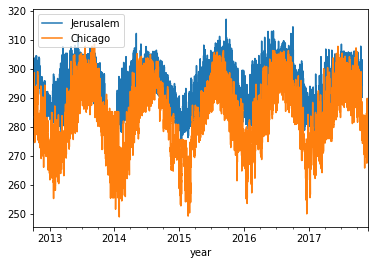

In [128]:
ax = plt.gca()
df.plot(x='datetime',y='Jerusalem' , ax = ax)
df.plot(x='datetime',y='Chicago' , ax = ax)
plt.xlabel('year');


In [146]:
def impute_mean(series):
    return series.fillna(series.median())


In [151]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(impute_mean,axis=0).round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,283.45,284.32,287.61,283.94,290.53,290.12,292.03,295.59,286.12,282.97,...,285.93,285.87,281.11,284.13,290.93,294.90,309.10,294.82,294.15,293.0
1,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.40,304.40,303.5
2,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.40,304.40,303.5
3,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.40,304.40,303.5
4,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.40,304.40,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,283.45,282.00,287.61,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,285.87,275.13,288.08,290.93,294.90,296.15,294.82,294.15,293.0
45249,283.45,282.89,287.61,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,285.87,274.13,286.02,290.93,294.90,296.15,294.82,294.15,293.0
45250,283.45,283.39,287.61,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,285.87,273.48,283.94,290.93,294.90,296.15,294.82,294.15,293.0
45251,283.45,283.02,287.61,282.96,295.65,292.61,292.15,297.15,286.14,289.17,...,284.57,285.87,272.48,282.17,290.93,294.90,296.15,294.82,294.15,293.0


In [140]:
df.isnull().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
month                  0
dtype: int64

In [153]:
df1= pd.read_csv('city_attributes.csv')
df1

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


## Write a function that efficiently fills in missing values in every column, except for trailing NANs

In [60]:
def num_missing(x):
  return sum(x.isnull())

df.apply(num_missing, axis=0)

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [70]:
def impute_interpolate(df):
    return df.interpolate(method ='linear', limit_direction ='forward',limit=2)

In [51]:
#def impute_interpolate(df):
#return df.interpolate(method ='linear', limit_direction ='forward',limit_area='inside')

#df['Salary'].interpolate(method='polynomial')

In [71]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(impute_interpolate,axis=0).round(2)
#def impute_interpolate(series):return series.interpolate(series.median())

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.4,304.4,303.5
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.4,304.4,303.5
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
def num_missing(x):
  return sum(x.isnull())

df.apply(num_missing, axis=0)

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [69]:
df.apply(num_missing, axis=0)

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [53]:
df.isnull().tail(500)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
44753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
interpolate_df =df.interpolate(method ='linear', limit_direction ='forward')

In [25]:
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.400,304.400,303.50
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.400,304.400,303.50
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.400,304.400,303.50
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.400,304.400,303.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,288.010000,282.000000,302.070000,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,284.980000,275.130000,288.080000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45249,2017-11-29 21:00:00,288.010000,282.890000,302.070000,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,284.980000,274.130000,286.020000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45250,2017-11-29 22:00:00,288.010000,283.390000,302.070000,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,284.980000,273.480000,283.940000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45251,2017-11-29 23:00:00,288.010000,283.020000,302.070000,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,284.980000,272.480000,282.170000,285.944000,294.150000,291.019000,299.369,299.369,294.15


In [29]:
def num_missing(x):
  return sum(x.isnull())

In [31]:
df.apply(num_missing, axis=0)

datetime             0
Vancouver            1
Portland             1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Albuquerque          1
Denver               1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Chicago              1
Nashville            1
Indianapolis         1
Atlanta              1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                0
Haifa                1
Nahariyya            1
Jerusalem            1
dtype: int64

In [32]:
df['New York']

0               NaN
1        288.220000
2        288.247676
3        288.326940
4        288.406203
            ...    
45248    284.980000
45249    284.980000
45250    284.980000
45251    284.980000
45252    284.980000
Name: New York, Length: 45253, dtype: float64

In [48]:
x = df['datetime']
knowns = df.loc[~df['Vancouver'].isnull(  ), ['datetime','Vancouver']]
xp = knowns['datetime']
fp = np.array(knowns['Vancouver'])

test = pd.DataFrame({'datetime':x, 'Vancouver': np.interp(x, xp, fp)})
test.round(2)


,datetime,Vancouver
0,2012-10-01 12:00:00,284.63
1,2012-10-01 13:00:00,284.63
2,2012-10-01 14:00:00,284.63
3,2012-10-01 15:00:00,284.63
4,2012-10-01 16:00:00,284.62
...,...,...
45248,2017-11-29 20:00:00,288.01
45249,2017-11-29 21:00:00,288.01
45250,2017-11-29 22:00:00,288.01
45251,2017-11-29 23:00:00,288.01


In [55]:
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.400,304.400,303.50
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.400,304.400,303.50
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.400,304.400,303.50
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.400,304.400,303.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,288.010000,282.000000,302.070000,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,284.980000,275.130000,288.080000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45249,2017-11-29 21:00:00,288.010000,282.890000,302.070000,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,284.980000,274.130000,286.020000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45250,2017-11-29 22:00:00,288.010000,283.390000,302.070000,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,284.980000,273.480000,283.940000,285.944000,294.150000,291.019000,299.369,299.369,294.15
45251,2017-11-29 23:00:00,288.010000,283.020000,302.070000,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,284.980000,272.480000,282.170000,285.944000,294.150000,291.019000,299.369,299.369,294.15


In [72]:
df['Month']=df['datetime'].dt.month
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Month
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.400,304.400,303.50,10
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.400,304.400,303.50,10
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.400,304.400,303.50,10
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.400,304.400,303.50,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,288.010000,282.000000,302.070000,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,284.980000,275.130000,288.080000,285.944000,294.150000,291.019000,299.369,299.369,294.15,11
45249,2017-11-29 21:00:00,288.010000,282.890000,302.070000,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,284.980000,274.130000,286.020000,285.944000,294.150000,291.019000,299.369,299.369,294.15,11
45250,2017-11-29 22:00:00,288.010000,283.390000,302.070000,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,284.980000,273.480000,283.940000,285.944000,294.150000,291.019000,299.369,299.369,294.15,11
45251,2017-11-29 23:00:00,288.010000,283.020000,302.070000,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.980000,272.480000,282.170000,285.944000,294.150000,291.019000,299.369,299.369,294.15,11


In [74]:
start_date = "2016-01-01"
end_date= "2017-12-01"

mask = (df['datetime'] > start_date) & (df['datetime'] <= end_date)
temp = df.loc[mask]
temp

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Month
28477,2016-01-01 01:00:00,272.080079,274.710000,282.360000,275.930000,288.140000,288.020000,279.800000,287.270000,271.970000,...,279.418535,272.300744,276.760000,282.489815,286.873079,282.645887,289.892789,288.625248,286.789121,1
28478,2016-01-01 02:00:00,271.350000,272.516075,281.036930,273.078169,281.564463,281.512194,274.173518,281.554841,263.721687,...,279.030000,272.210000,276.132549,281.792000,287.680000,282.317000,290.370000,288.817000,287.700000,1
28479,2016-01-01 03:00:00,271.205321,273.530000,279.160000,273.010000,284.270000,284.450000,278.090000,282.740000,267.730000,...,278.873939,272.067846,275.870000,281.787270,287.505756,282.950323,289.859122,288.026739,287.635042,1
28480,2016-01-01 04:00:00,270.490000,273.482273,278.215575,272.505446,283.842320,283.443253,277.081156,281.441419,267.471812,...,278.350000,271.340000,275.680000,281.752000,286.210000,287.660000,286.060000,282.150000,286.240000,1
28481,2016-01-01 05:00:00,270.280978,273.430000,277.190000,271.950000,283.380000,282.350000,275.980000,280.050000,267.190000,...,277.134692,271.108045,275.675522,281.745932,285.594444,286.594063,286.529698,283.468367,285.833735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,288.010000,282.000000,302.070000,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,284.980000,275.130000,288.080000,285.944000,294.150000,291.019000,299.369000,299.369000,294.150000,11
45249,2017-11-29 21:00:00,288.010000,282.890000,302.070000,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,284.980000,274.130000,286.020000,285.944000,294.150000,291.019000,299.369000,299.369000,294.150000,11
45250,2017-11-29 22:00:00,288.010000,283.390000,302.070000,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,284.980000,273.480000,283.940000,285.944000,294.150000,291.019000,299.369000,299.369000,294.150000,11
45251,2017-11-29 23:00:00,288.010000,283.020000,302.070000,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.980000,272.480000,282.170000,285.944000,294.150000,291.019000,299.369000,299.369000,294.150000,11


In [80]:
df.set_index('datetime').round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,Month
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN,10
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,288.22,285.83,287.17,307.59,305.47,310.58,304.40,304.40,303.50,10
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,288.25,285.83,287.19,307.59,304.31,310.50,304.40,304.40,303.50,10
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,288.33,285.85,287.23,307.39,304.28,310.41,304.40,304.40,303.50,10
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,288.41,285.86,287.28,307.15,304.24,310.33,304.40,304.40,303.50,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,288.01,282.00,302.07,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,284.98,275.13,288.08,285.94,294.15,291.02,299.37,299.37,294.15,11
2017-11-29 21:00:00,288.01,282.89,302.07,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,284.98,274.13,286.02,285.94,294.15,291.02,299.37,299.37,294.15,11
2017-11-29 22:00:00,288.01,283.39,302.07,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,284.98,273.48,283.94,285.94,294.15,291.02,299.37,299.37,294.15,11


In [ ]:
import seaborn as sns
df1=df.loc[: ,'Vancouver' :'Jerusalem']
sns.heatmap(df1,cmap="YlGnBu",yticklabels=False,xticklabels=False,annot=True)
plt.xlabel("month")
plt.ylabel("cities")
plt.show()

In [5]:
import seaborn as sns

In [ ]:
df1=df.loc[: ,'Vancouver' :'Jerusalem']
#x = 'datetime'
#y = 
plt.figure(figsize=(10,5))
sns.heatmap(df1,annot=True)

In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('temperature.csv',parse_dates=['datetime'])
df.round(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44458 non-null  float64       
 2   Portland           45252 non-null  float64       
 3   San Francisco      44460 non-null  float64       
 4   Seattle            45250 non-null  float64       
 5   Los Angeles        45250 non-null  float64       
 6   San Diego          45252 non-null  float64       
 7   Las Vegas          45252 non-null  float64       
 8   Phoenix            45250 non-null  float64       
 9   Albuquerque        45252 non-null  float64       
 10  Denver             45252 non-null  float64       
 11  San Antonio        45252 non-null  float64       
 12  Dallas             45249 non-null  float64       
 13  Houston            45250 non-null  float64       
 14  Kansas

In [18]:
df.pivot_table(index="datetime",columns="New York")

MemoryError: Unable to allocate 123. GiB for an array with shape (44460, 370860) and data type float64

In [22]:
df_stacked =df.stack(level=0)
df_stacked

0      datetime        2012-10-01 12:00:00
       Eilat                         309.1
1      datetime        2012-10-01 13:00:00
       Vancouver                    284.63
       Portland                     282.08
                              ...         
45252  Pittsburgh                   279.19
       Toronto                      274.51
       Philadelphia                 283.42
       Montreal                      271.8
       Boston                       280.65
Length: 1666331, dtype: object

In [23]:
df.unstack()

datetime   0        2012-10-01 12:00:00
           1        2012-10-01 13:00:00
           2        2012-10-01 14:00:00
           3        2012-10-01 15:00:00
           4        2012-10-01 16:00:00
                           ...         
Jerusalem  45248                    NaN
           45249                    NaN
           45250                    NaN
           45251                    NaN
           45252                    NaN
Length: 1674361, dtype: object

In [4]:
df['Portland']

mean    284.992929
min     262.370000
max     312.520000
Name: Portland, dtype: float64